# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ w_{new} = w_{old} - \alpha * \frac{\partial L(w_{old})}{\partial w} $$

$$ \frac{\partial L(w_{old})}{\partial w} = \frac{2}{n} * \sum\limits_{j=1}^n{ (x_jw_{old} - y_j)x_j } + \frac{2w_{old}}{C} $$

$$ w_{new} = (1 - \frac{2\alpha}{C})w_{old} - \frac{2\alpha}{n} * \sum\limits_{j=1}^n{ (x_jw_{old} - y_j)x_j } $$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$ w_{new} = w_{old} - \alpha * \frac{\partial L(w_{old})}{\partial w} $$

$$ \frac{\partial L(w_{old})}{\partial w} = - \frac{1}{n} * \sum\limits_{j=1}^n{( \frac{y_j \sigma (1 - \sigma) x_j}{\sigma} - \frac{(1 - y_j) \sigma (1 - \sigma) x_j}{1 - \sigma} )} + \frac{2w_{old}}{C} = - \frac{1}{n} * \sum\limits_{j=1}^n{(y_j - \sigma) x_j} + \frac{2w_{old}}{C} $$

$$ w_{new} = (1 - \frac{2\alpha}{C})w_{old} + \frac{\alpha}{n} * \sum\limits_{j=1}^n{(y_j - \sigma) x_j} $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$ \nabla_w^2 Q = 2X^TX - Гессиан$$

По определению: $ \forall z \in R^n: z \neq 0: z^TX^TXz = ||Xz|| > 0 $, так как матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Значит, Гессиан положительно определен в точке, градиент которой равен 0 $=>$ эта точка - локальный минимум.

Если матрица $X$ имеет линейно зависимые строки $=> X^TX$ имеет линейно зависимые строки и не имеет обратной матрицы. С помощью $L2$ регуляризации мы можем сделать строки матрицы, которую будем обращать, линейно независимыми. 

$$ \omega = (X^TX + \lambda I)^{-1}X^TY $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$ \frac{\partial E(L|x_i)}{\partial a(x_i)} = - \frac{p(y_i=1|x_i)}{a(x_i)} + \frac{p(y_i=0|x_i)}{1 - a(x_i)} = - \frac{p(y_i=1|x_i)}{a(x_i)} + \frac{1 - p(y_i=1|x_i)}{1 - a(x_i)} = \frac{- p(y_i=1|x_i) + a(x_i)p(y_i=1|x_i) + a(x_i) - a(x_i)p(y_i=1|x_i)}{a(x_i)(1 - a(x_i))} = \frac{a(x_i) - p(y_i=1|x_i)}{a(x_i)(1 - a(x_i))} = 0 => $$

$$ a(x_i) = p(y_i=1|x_i) $$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Ответ: нет

Мы используем регуляризацию для того, чтобы наша модель не переобучалась и не "подстраивалась" под определенные признаки. Соответственно, наша модель не может "подстроиться" под константный признак и штрафовать за это не имеет смысла. К тому же, если мы будем штрафовать модель за большое значение переменной $w_0$, значит мы предполагаем близость целевой переменной к 0, что неверно в общем случае.

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [ ]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [ ]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [ ]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [ ]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [202]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    indices = np.arange(y.shape[0])
    if shuffle:
        np.random.shuffle(indices)

    X = np.asarray(X)
    y = np.asarray(y)
    for i in range(0, y.shape[0], batch_size):
        X_batch = X[indices[i:i + batch_size]]
        y_batch = y[indices[i:i + batch_size]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [224]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))

    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', threshold=0.5, batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.threshold = threshold
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        Xw = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            y_batch[y_batch == 0] = -1
            loss = np.mean((y_batch - Xw) ** 2)
        else:
            a = sigmoid(Xw)
            log_a = np.log(a)
            loss = -np.mean(y_batch * log_a + (1 - y_batch) * np.log(1 - a))
        loss += np.sum(self.weights[1:] ** 2) / self.C

        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь
        по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = X_batch.shape[0]

        Xw = np.dot(X_batch, self.weights)
        if self.model_type == 'lin_reg':
            y_batch[y_batch == 0] = -1
            loss_grad = - 2 * np.dot(y_batch - Xw, X_batch) / n
        else:
            loss_grad = - np.dot(y_batch - sigmoid(Xw), X_batch) / n
        loss_grad += 2 * self.weights / self.C

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)

        # Нужно инициализровать случайно веса
        self.weights = np.random.rand(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y,
                                                       batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку
                # для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        # Желательно здесь использовать матричные операции между X и весами,
        # например, numpy.dot

        X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        y_hat = np.dot(X, self.weights)
        if self.model_type == 'lin_reg':
            y_hat = (y_hat > 0).astype(int)
        else:
            y_hat = sigmoid(y_hat)
            y_hat = (y_hat > self.threshold).astype(int)
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [225]:
def plot_decision_boundary(clf, label='Model'):
    x = np.linspace(-3, 3)
    plt.plot(x, (- clf.weights[0] - x * clf.weights[1]) / clf.weights[2],
             label=label)

    plt.legend()

[ 0.00247782  0.34927606 -0.12349791]
[-0.01530272  0.14150492 -0.09295401]


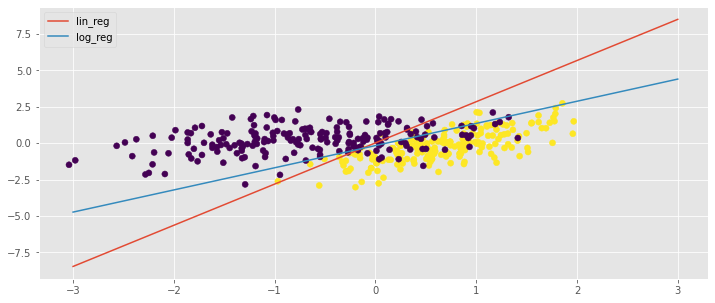

In [226]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

X = (X - X.mean(axis=0)) / X.std(axis=0)

model_lin = MySGDClassifier(batch_generator)
model_lin.fit(X, y)
plot_decision_boundary(model_lin, 'lin_reg')

print(model_lin.weights)

model_log = MySGDClassifier(batch_generator, model_type='log_reg')
model_log.fit(X, y)
plot_decision_boundary(model_log, 'log_reg')

print(model_log.weights)


plt.scatter(X[:, 0], X[:, 1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [229]:
from sklearn.datasets import make_classification

In [230]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [231]:
def plot_model_alpha(model_type, N=50, array_alpha=None):
    if array_alpha is None:
        array_alpha = [0.1, 0.05, 0.01, 0.001, 0.0005, 0.0001]
    for alpha in array_alpha:
        model = MySGDClassifier(batch_generator, alpha=alpha,
                                model_type=model_type, max_epoch=10,
                                batch_size=200)
        model.fit(X, y)

        loss = np.asarray(model.errors_log['loss']).reshape(-1, N).mean(axis=1)
        plt.plot(N * np.arange(loss.shape[0]), loss, label=alpha)

    plt.title(f'{model_type} {N}')
    plt.ylabel("mean loss")
    plt.legend()
    plt.show()

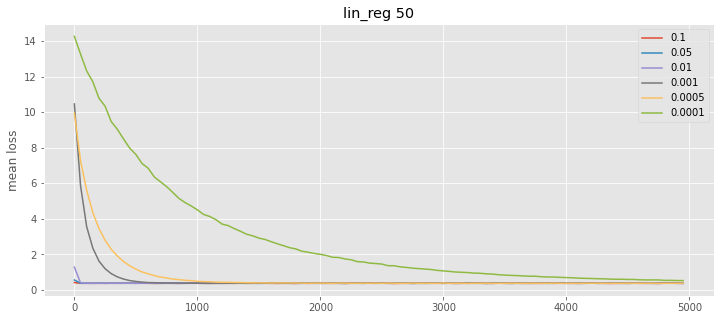

In [232]:
plot_model_alpha('lin_reg')

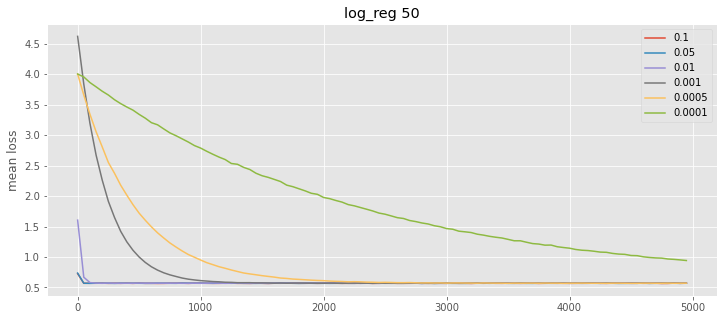

In [233]:
plot_model_alpha('log_reg')

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [234]:
def plot_model_c(model_type):
    array_c = np.logspace(3, -3, 10)
    mean_w = []
    for C in array_c:
        model = MySGDClassifier(batch_generator, C=C, alpha=0.00001,
                                batch_size=200)
        model.fit(X, y)
        mean_w.append(model.weights.mean())
    plt.xscale("log")
    plt.plot(array_c, mean_w)

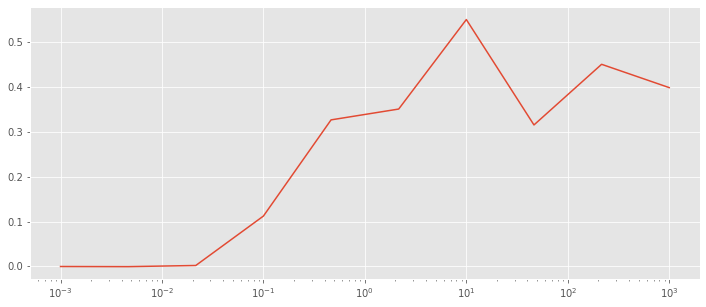

In [235]:
plot_model_c('lin_reg')

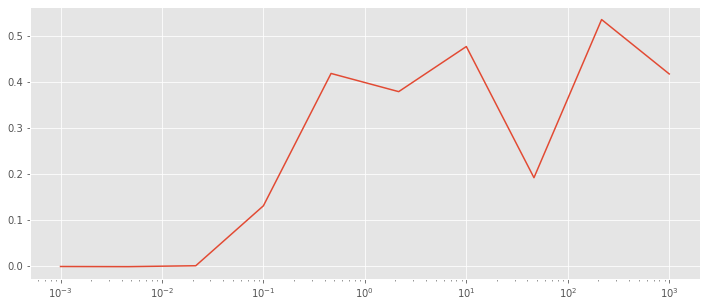

In [236]:
plot_model_c('log_reg')

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [237]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [238]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [239]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [240]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

In [241]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Best is 10000
CPU times: user 1min, sys: 496 ms, total: 1min
Wall time: 1min


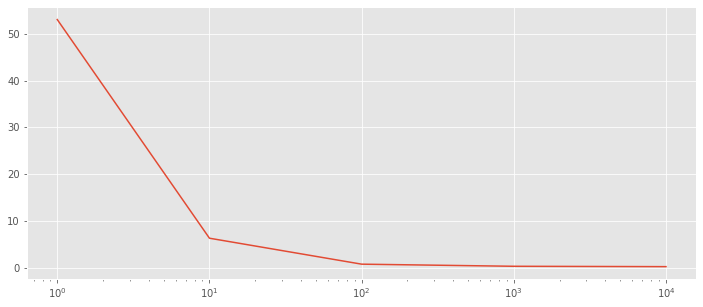

In [242]:
%%time
import time
fit_time = []
array_batch_size = list(map(int, np.logspace(0, 4, 5)))

for batch_size in array_batch_size:
    start_time = time.time()
    model = MySGDClassifier(batch_generator, max_epoch=100,
                            batch_size=batch_size)
    model.fit(X_train, y_train)
    fit_time.append(time.time() - start_time)

fit_time = np.asarray(fit_time)
batch_size = array_batch_size[np.argmin(fit_time)]
print(f'Best is {batch_size}')

plt.xscale("log")
plt.plot(array_batch_size, fit_time)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [243]:
def plot_by_alpha(scores):
    for model_type in scores:
        for C in scores[model_type]:
            for max_epoch in scores[model_type][C]:
                p = scores[model_type][C][max_epoch]
                plt.plot(list(p.keys()), list(p.values()),
                         label=f'{model_type}, C={C}, ep={max_epoch}')
    plt.xlabel('Alpha')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

In [244]:
import time


def cross_validate(params):
    best_model = None
    best_score = 0
    scores = {}
    for model_type, C, alpha, max_epoch in list(params):
        start_time = time.time()
        model = MySGDClassifier(batch_generator, C=C, alpha=alpha,
                                max_epoch=max_epoch, model_type=model_type,
                                batch_size=batch_size)
        score = cross_val_score(model, X_train, y_train, cv=3,
                                groups=groups_train, scoring='f1').mean()
        print(f'Model: {model}\nScore: {score}')
        print(f'Time: {time.time() - start_time}')
        print()

        if model_type not in scores:
            scores[model_type] = {}
        if C not in scores[model_type]:
            scores[model_type][C] = {}
        if max_epoch not in scores[model_type][C]:
            scores[model_type][C][max_epoch] = {}
        scores[model_type][C][max_epoch][alpha] = score

        if score > best_score:
            best_score = score
            best_model = model

    plot_by_alpha(scores)
    print(f'Best model is {best_model}\nBest score is {best_score}')
    return best_model

Model: MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=10, model_type='lin_reg',
                threshold=0.5)
Score: 0.6082520578964701
Time: 0.06532788276672363

Model: MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=50, model_type='lin_reg',
                threshold=0.5)
Score: 0.6141751958469135
Time: 0.2134556770324707

Model: MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=100, model_type='lin_reg',
                threshold=0.5)
Score: 0.6148767272081047
Time: 0.4284861087799072

Model: MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=200

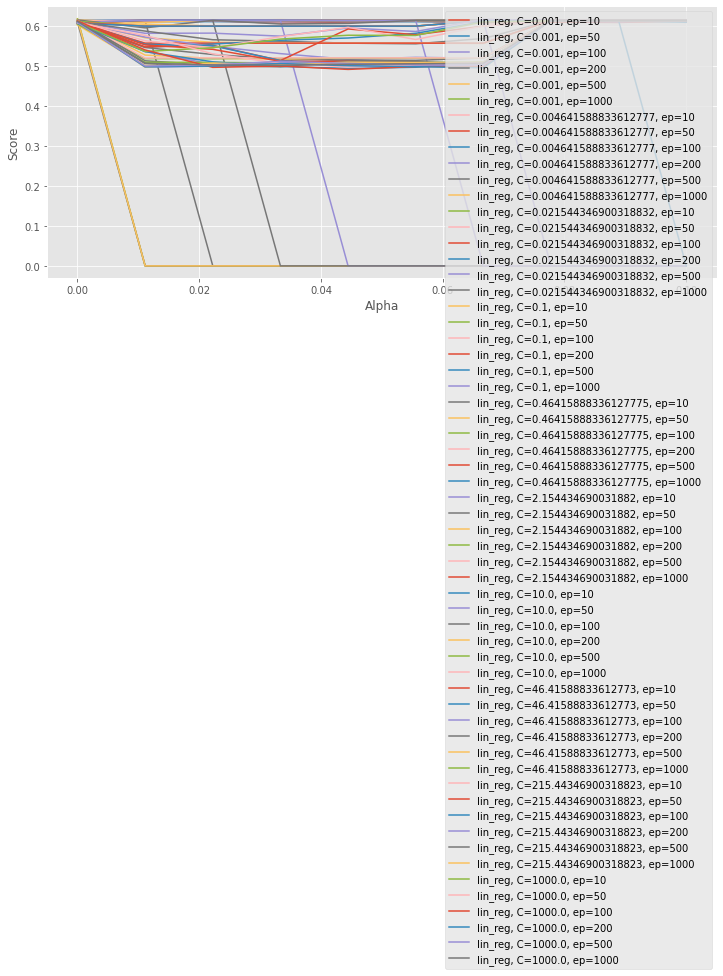

Best model is MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=500, model_type='lin_reg',
                threshold=0.5)
Best score is 0.6192005482236609
CPU times: user 14min 39s, sys: 9min 32s, total: 24min 12s
Wall time: 12min 20s


In [255]:
%%time
from itertools import product
import warnings
warnings.filterwarnings('ignore')

params = product(
    ['lin_reg'],  # model_type
    np.logspace(-3, 3, 10),  # C
    np.linspace(1e-5, 1e-1, 10),  # alpha
    [10, 50, 100, 200, 500, 1000]  # max_epoch
)

cross_validate(params)

Model: MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=10, model_type='log_reg',
                threshold=0.5)
Score: 0.6109749401012875
Time: 0.09690570831298828

Model: MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=50, model_type='log_reg',
                threshold=0.5)
Score: 0.6122802233954031
Time: 0.38109278678894043

Model: MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=100, model_type='log_reg',
                threshold=0.5)
Score: 0.6124697800146156
Time: 0.7558085918426514

Model: MySGDClassifier(C=0.001, alpha=1e-05,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=20

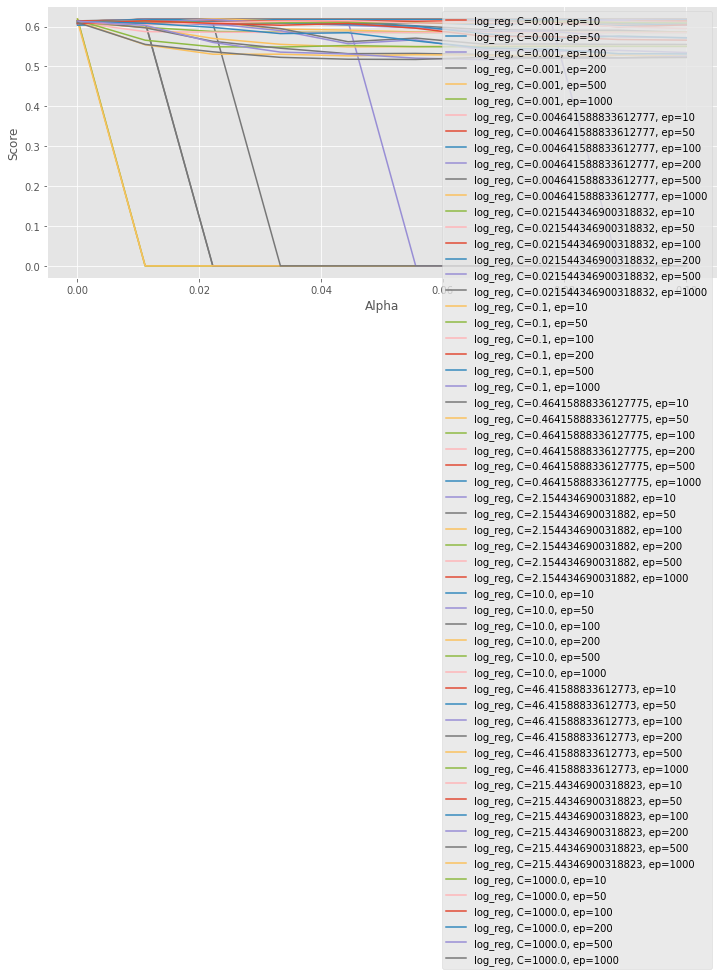

Best model is MySGDClassifier(C=2.154434690031882, alpha=0.022230000000000003,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=100, model_type='log_reg',
                threshold=0.5)
Best score is 0.6195793262796503
CPU times: user 25min 37s, sys: 17min 31s, total: 43min 9s
Wall time: 21min 55s


In [247]:
%%time
from itertools import product
import warnings
warnings.filterwarnings('ignore')

params = product(
    ['log_reg'],  # model_type
    np.logspace(-3, 3, 10),  # C
    np.linspace(1e-5, 1e-1, 10),  # alpha
    [10, 50, 100, 200, 500, 1000]  # max_epoch
)

cross_validate(params)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

Model: MySGDClassifier(C=2.154434690031882, alpha=0.022230000000000003,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=500, model_type='log_reg',
                threshold=0.3)
F1-Score: 0.49762996347812566

Model: MySGDClassifier(C=2.154434690031882, alpha=0.022230000000000003,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=500, model_type='log_reg',
                threshold=0.31)
F1-Score: 0.49952919020715636

Model: MySGDClassifier(C=2.154434690031882, alpha=0.022230000000000003,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=500, model_type='log_reg',
                threshold=0.32)
F1-Score: 0.5033396946564885

Model: MySGDClassifier(C=2.154434690031882, alpha=0.022230000000000003,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,


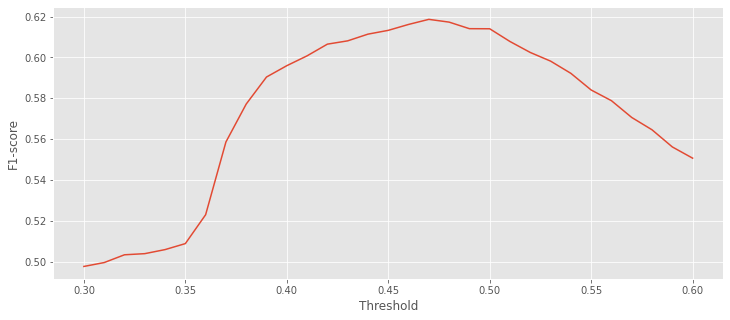

CPU times: user 2min 13s, sys: 1min 30s, total: 3min 43s
Wall time: 1min 53s


In [259]:
%%time
f1_scores = []
thresholds = []

for threshold in np.linspace(0.3, 0.6, 31):
    best_model.threshold = threshold
    predict = cross_val_predict(best_model, X_train, y_train, cv=3,
                                groups=groups_train)
    score = f1_score(y_train, predict)
    print(f'Model: {best_model}\nF1-Score: {score}')
    print()
    f1_scores.append(score)
    thresholds.append(threshold)

thresholds = np.asarray(thresholds)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f'Best is {best_threshold}')
best_model.threshold = best_threshold

plt.plot(thresholds, f1_scores)
plt.xlabel("Threshold")
plt.ylabel("F1-score")
plt.show()

In [260]:
print(best_model)

MySGDClassifier(C=2.154434690031882, alpha=0.022230000000000003,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=500, model_type='log_reg',
                threshold=0.47)


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [261]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

X_test = []
y_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
y_test = np.array(y_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)
X_test = scaler.transform(X_test)

(16627, 15) (16627,)


In [262]:
import time
best_model.fit(X_train, y_train)
y_test = np.asarray(best_model.predict(X_test))
test_data["target"] = pd.Series(y_test)
name = str(time.time()) + "_predict.csv"
with open(name, "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

print(name)
print(best_model)

1604944655.08473_predict.csv
MySGDClassifier(C=2.154434690031882, alpha=0.022230000000000003,
                batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
                batch_size=10000, max_epoch=500, model_type='log_reg',
                threshold=0.47)


In [ ]:
# 1604944655.08473_predict.csv
# MySGDClassifier(C=2.154434690031882, alpha=0.022230000000000003,
#                 batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
#                 batch_size=10000, max_epoch=500, model_type='log_reg',
#                 threshold=0.47)

In [ ]:
# 1604942839.724433_predict.csv
# MySGDClassifier(C=0.001, alpha=7.525e-05,
#                 batch_generator=<function batch_generator at 0x7fc6166dc7b8>,
#                 batch_size=10000, max_epoch=10, model_type='log_reg',
#                 threshold=0.5656565656565657)

In [ ]:
# 1604933787.5047076_predict.csv
# MySGDClassifier(C=0.01, alpha=1e-05,
#                 batch_generator=<function batch_generator at 0x7fc614fb9d90>,
#                 max_epoch=100, model_type='log_reg', threshold=0.35)

In [ ]:
# 1604932676.1901956_predict.csv
# MySGDClassifier(C=31.622776601683793, alpha=0.01,
#                 batch_generator=<function batch_generator at 0x7fc614fb9d90>,
#                 max_epoch=100, model_type='log_reg', threshold=0.36)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***